The search algorthim found 5 matches
The search algorthim found 95  mismatches


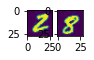

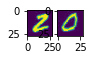

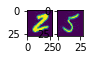

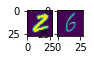

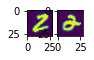

In [16]:
#Import All the necessary libraries



import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
import cv2
import pandas as pd
from scipy.spatial import distance
from scipy.ndimage import rotate

#Open the images and save them to a np.imarray
path = 'C:\\Users\\frede\\DS Final Project\\MNIST_DS'
# onlyimages used to get all the images form my directory 

onlyimages = [ f for f in listdir(path)if isfile (join(path, f))]
#img created as an empty array to hold the images as an object of a length equal to the size of the directory
img = np.empty (len(onlyimages), dtype = object)

#for loop used to get the range of files from the first image the last image
for n in range (0 , len (onlyimages)):
  #hold the image in an array  
    img[n] = cv2.imread(join (path, onlyimages[n]),0)

def getimage(g):
# Need to redine the image arry so it can be called in future functions
    path = 'C:\\Users\\frede\\DS Final Project\\MNIST_DS'
# onlyimages used to get all the images form my directory 

    onlyimages = [ f for f in listdir(path)if isfile (join(path, f))]
#img created as an empty array to hold the images as an object of a length equal to the size of the directory
    img = np.empty (len(onlyimages), dtype = object)

#for loop used to get the range of files from the first image the last image
    for n in range (0 , len (onlyimages)):
  #hold the image in an array  
        img[n] = cv2.imread(join (path, onlyimages[n]),0)
    return img[g]
#get the projection of each image
def getprojection(imgarray,ang,n):#needs parameter of the nth barcode and the img storing array and the angle of the projection
    #intiate the image array with the list of images in the get image funcion
    imgarray = getimage(n)
    #4 cases for each projection to see how we generate the barcode
    
    
    if (ang == 0):
        proj1 = np.sum(getimage(n), axis = 0)
        projection1 = convertBin(proj1)
        return projection1 
    
    if(ang == 90):
        proj3 = np.sum(getimage(n), axis = 1)
        projection3 = convertBin(proj3)
        return projection3
    
    elif (ang == 45):
        
        proj45 = rotate(getimage(n), 45)
        proj2 = np.sum(proj45, axis = 0)
        projection2 = convertBin(proj2)
        return projection2
    
    else:
        proj135 = rotate(getimage(n),135)
        proj4 = np.sum(proj135, axis = 1)
        projection4 = convertBin(proj4)
        return projection4
 #get the binary version of each barcode   
def convertBin(projectarray):
   
    thresholdvalue = (np.sum(projectarray)/28)#calcuate the mean value of the current projection
    
    compar = np.greater(thresholdvalue, projectarray)# check to see if the indivual values in the array are less than the mean average of the array
        
    for n in range (len(compar)):
            if compar[n]:
                projectarray[n] = 1;
            else:
                projectarray[n] = 0;
   
        
    return projectarray
#hold each barcode in an array
def barcodegen(imgarray,n):
    Barcode1 = np.concatenate((getprojection(imgarray,0,n), getprojection(imgarray,45,n)))
    Barcode2 = np.concatenate((getprojection(imgarray,90,n), getprojection(imgarray,135,n)))
    Barcode3 = np.concatenate([Barcode1, Barcode2])
    return Barcode3
#intiate Barcode array outside the functions
barcodearray = np.empty (len(onlyimages), dtype = object)
for n in range (0 , len (onlyimages)):
            barcodearray[n] = barcodegen(getimage(n),n)
        
#Enter a image number to see the image then search for an image tjhat matches that class
#You need to enter a barcode array index number which corresponds to an image  ex searchalgo(barcodearray[45],45) will correspond to number 4
# for both n,g you can enter  number between 0-99 as there only 100 images  *important n must = g since they are one in the same the index for the barcode image
#Once the index is chosen the search algothim prints out the images you are indexing next to the most similar image next to it then counts the number of cooresponding images
#When measuring retrival accuracy you count to see how many images it printed where of the same class
#In this case it found 10 matches, however only 2 of those where 4 so this means the accuarcy for this image was 20%
#The accuracy changes depending on the image chosen
def searchalgo(barcode1,g):# takes the barcode of a random image to see if it can find an appropriate cooresponding field
    count1= 0
    count2=0
    imgBarcode1 =img[g]# have both barcodes intitally equal the same image cooresponding to the indicated barcode
    
    
    imgBarcode2 = np.empty([28, 28], dtype=int)
    #hammingodistance between two images
    for n in range (0 , len (onlyimages)):
        #Searching throuhg each image to see if the image chosen has a hamming distance less than 1
        if (distance.hamming(barcode1,barcodearray[n]) < 0.0999 and distance.hamming(barcode1,barcodearray[n]) != 0 ) :
            count1+=1
           #Print out the image indexed when the function was called and the found image 
            imgBarcode1 = img[g]
            imgBarcode2 = img[n]
            
            plt.figure(figsize=[1, 2])
            plt.subplot(1,2,1)
            plt.imshow(imgBarcode1)
            plt.subplot(1,2,2)
            plt.imshow(imgBarcode2)
        else:
            #Record how many images of the 99 were not found to match
            count2+= 1
    
    print ("The search algorthim found " + str(count1) + " matches" )
    print ("The search algorthim found " + str(count2) + "  mismatches" )
searchalgo(barcodearray[34],34)